<a href="https://colab.research.google.com/github/NabilaAtiraQurratulAini/DataAnalyst/blob/main/Tugas_Praktik_Materi_19_Statistics_on_Python_2_Nabila_Atira_Qurratul_Aini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Nabila Atira Qurratul Aini

Kelompok : 8 - Aldi Purwanto

**Soal :**

1. Pahami data produksi dan sales pada link berikut :

  https://drive.google.com/file/d/1NN8BalBQgjLoAjAP3ZBkRisX0ZHa8_4p/view

  a. Kolom apa yang memiliki nilai **pearson correlation lebih tinggi** terhadap kolom sales?

  b. Bulan apa yang memiliki **rata-rata sales tertinggi** secara signifikan? Buktikan dengan **hypothesis testing?**
  
  c. Lakukan **forecasting** menggunakan moving average dengan rolling moving average 7 hari!

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from google.colab import drive
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [3]:
# mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
data = pd.read_csv('/content/drive/My Drive/Google Colaboratory/datalatihan.csv')
data.head()

,bulan,tanggal,total_jam_produksi,total_jam_lembur,sales
0,2024-01-01,2024-01-01,425,250,1010
1,2024-01-01,2024-01-02,694,281,985
2,2024-01-01,2024-01-03,632,218,1015
3,2024-01-01,2024-01-04,521,122,997
4,2024-01-01,2024-01-05,566,159,1290


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bulan               60 non-null     object
 1   tanggal             60 non-null     object
 2   total_jam_produksi  60 non-null     int64 
 3   total_jam_lembur    60 non-null     int64 
 4   sales               60 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


**Jawaban :**

**a.**

In [6]:
# menghitung korelasi antara kolom 'total_jam_produksi' dan 'sales'
correlation_prod_sales = data[['total_jam_produksi', 'sales']].corr()
correlation_prod_sales

,total_jam_produksi,sales
total_jam_produksi,1.000000,0.500706
sales,0.500706,1.000000


In [7]:
produksi_sales = data[['total_jam_produksi', 'sales']].corr().iloc[0, 1]
produksi_sales

0.50070633107447

In [8]:
# menghitung korelasi antara kolom 'total_jam_lembur' dan 'sales'
correlation_lembur_sales = data[['total_jam_lembur', 'sales']].corr()
correlation_lembur_sales

,total_jam_lembur,sales
total_jam_lembur,1.000000,0.217809
sales,0.217809,1.000000


In [9]:
lembur_sales = data[['total_jam_lembur', 'sales']].corr().iloc[0, 1]
lembur_sales

0.21780895535269598

In [10]:
print("Kolom yang memiliki nilai Pearson correlation lebih tinggi terhadap kolom 'sales' adalah 'total_jam_produksi' dengan nilai korelasi", produksi_sales)

Kolom yang memiliki nilai Pearson correlation lebih tinggi terhadap kolom 'sales' adalah 'total_jam_produksi' dengan nilai korelasi 0.50070633107447


In [11]:
# menghitung korelasi antara kolom 'total_jam_produksi', 'total_jam_lembur' dan 'sales'
correlation_prod_lembur_sales = data[['total_jam_produksi', 'total_jam_lembur', 'sales']].corr()
correlation_prod_lembur_sales

,total_jam_produksi,total_jam_lembur,sales
total_jam_produksi,1.000000,0.090390,0.500706
total_jam_lembur,0.090390,1.000000,0.217809
sales,0.500706,0.217809,1.000000


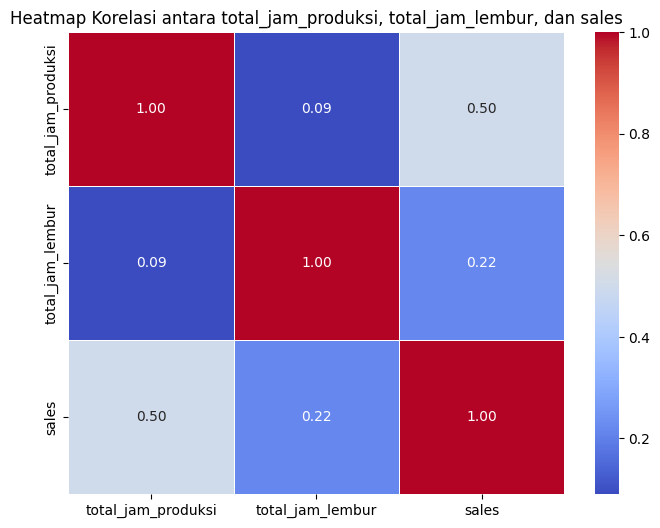

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_prod_lembur_sales, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi antara total_jam_produksi, total_jam_lembur, dan sales')
plt.show()

**b.**

In [14]:
# menghitung rata-rata sales untuk setiap bulan
mean_sales_by_month = data.groupby('bulan')['sales'].mean()
mean_sales_by_month

bulan
2024-01-01    1193.806452
2024-02-01     933.344828
Name: sales, dtype: float64

In [15]:
jan_sales = data[data['bulan'] == '2024-01-01']['sales']
feb_sales = data[data['bulan'] == '2024-02-01']['sales']

In [16]:
t_stat, p_value = stats.ttest_ind(a=jan_sales, b=feb_sales, alternative='greater')
print(f"Hasil uji t antara Januari dan Februari: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

Hasil uji t antara Januari dan Februari: t-statistic = 8.74, p-value = 0.0000


In [17]:
alpha = 0.05
if p_value < alpha:
    print("Rata-rata sales pada bulan Januari lebih besar dari Februari atau terdapat perbedaan yang signifikan.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara rata-rata sales pada bulan Januari dan Februari.")

Rata-rata sales pada bulan Januari lebih besar dari Februari atau terdapat perbedaan yang signifikan.


**c.**

In [42]:
data_prophet = data[['tanggal', 'sales']]
data_prophet.head()

,tanggal,sales
0,2024-01-01,1010
1,2024-01-02,985
2,2024-01-03,1015
3,2024-01-04,997
4,2024-01-05,1290


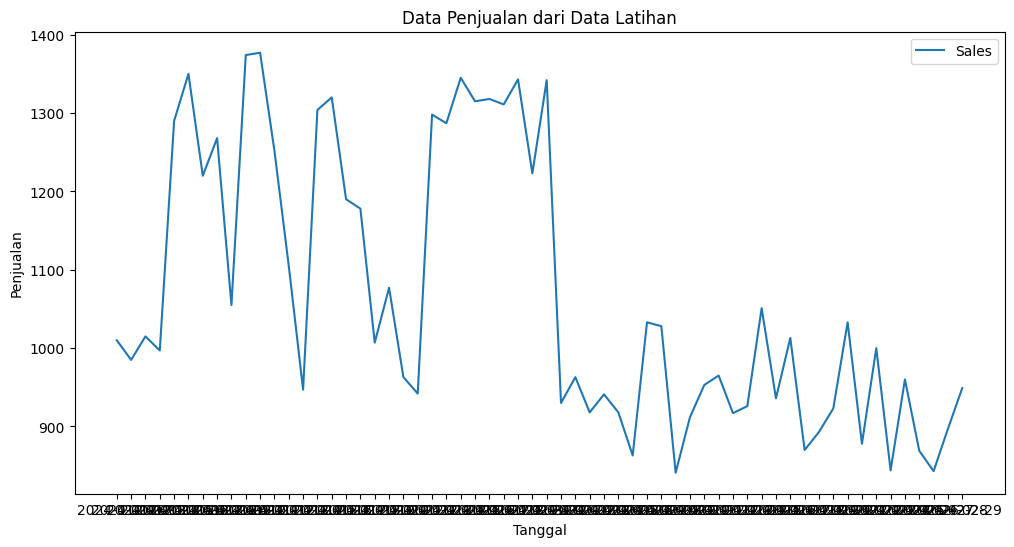

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(data_prophet['tanggal'], data_prophet['sales'], label='Sales')
plt.xlabel('Tanggal')
plt.ylabel('Penjualan')
plt.title('Data Penjualan dari Data Latihan')
plt.legend()
plt.show()

In [37]:
# membagi data menjadi data pelatihan (80%) dan data uji (20%)
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

print('Jumlah data train yang digunakan sebanyak :', len(train_data))
print('Jumlah data test yang digunakan sebanyak :', len(test_data))

Jumlah data train yang digunakan sebanyak : 48
Jumlah data test yang digunakan sebanyak : 12


In [38]:
# menghitung rolling moving average 7 hari untuk kolom 'sales'
data['rolling_ma_7'] = data['sales'].rolling(window=7).mean()

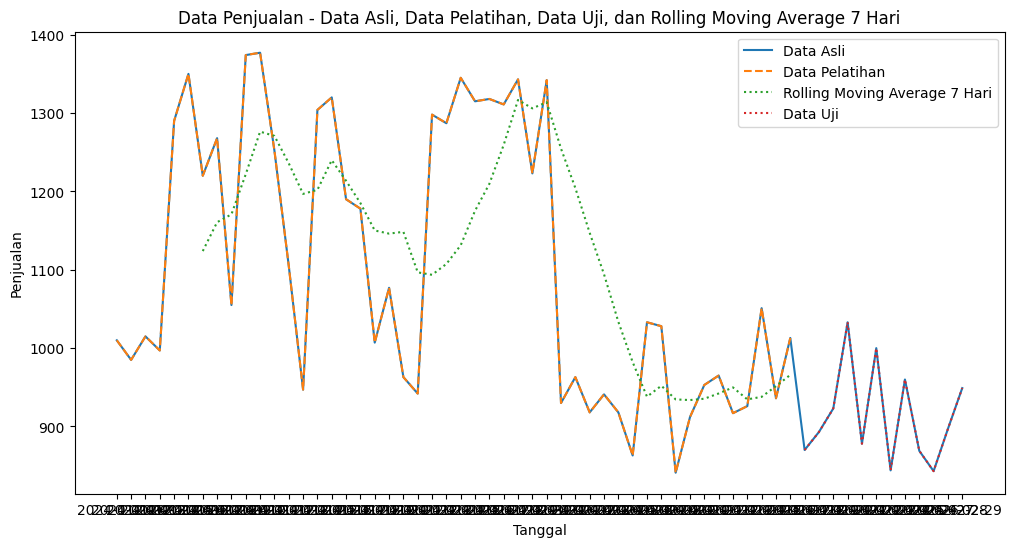

In [39]:
# data asli
plt.figure(figsize=(12, 6))
plt.plot(data_prophet['tanggal'], data_prophet['sales'], label='Data Asli')

# data latih
plt.plot(train_data['tanggal'], train_data['sales'], label='Data Pelatihan', linestyle='dashed')

# rolling moving average 7 hari
plt.plot(train_data['tanggal'], train_data['rolling_ma_7'], label='Rolling Moving Average 7 Hari', linestyle='dotted')

# data uji
plt.plot(test_data['tanggal'], test_data['sales'], label='Data Uji', linestyle='dotted')

plt.xlabel('Tanggal')
plt.ylabel('Penjualan')
plt.title('Data Penjualan - Data Asli, Data Pelatihan, Data Uji, dan Rolling Moving Average 7 Hari')
plt.legend()
plt.show()

In [40]:
# data yang akan dihitung MAPE dan RMSE
y_true = test_data['sales']
y_pred = test_data['rolling_ma_7']

# fungsi untuk menghitung MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# menghitung RMSE menggunakan scikit-learn
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# menghitung MAPE menggunakan fungsi calculate_mape yang telah dibuat
mape = calculate_mape(y_true, y_pred)

print(f'MAPE: {mape:.2f}%')
print(f'RMSE: {rmse:.2f}')

MAPE: 5.75%
RMSE: 57.21
